# <center> Recuperação da informação na Web e em Redes Sociais - Projeto Final </center>

<center>FALCÃO E O SOLDADO INVERNAL: Análise de sentimentos dos tweets coletados durante a estreia da série
</center>

Autor: Natália Antunes <br>


OBJETIVOS:<br>
Este notebook tem como objetivo realizar a análise exploratória dos dados e pré-processamento da base de dados.

In [1]:
## Carregando as bibliotecas/ pacotes necessários
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import os
import re

In [2]:
## Carregando a base de dados
base= pd.read_excel('tweets.xlsx', sheet_name='default_1')

In [3]:
base.head()

,Grupo,turno_coleta,Tweet,Tweet ID,Time,Favorited,Retweeted,Is Favourited,Is Retweeted,Is Retweet,...,User - Description,User - URL,User - Creation time,User - Language,User - Location,User - Time Zone,User - Statuses,User - Followers,User - Friends,User - Favourites
0,Coleta 1,Manhã,RT @cinepop: 'Falcão e o Soldado Invernal': Pr...,156696580,2021-03-19 07:58:33,0,4,False,False,True,...,such a mess | 97’s | 👨🏻‍🤝‍👨🏽,NaN,2013-02-21 19:54:22,NaN,"Marataízes, Brasil",NaN,15627,938,906,21921
1,Coleta 1,Manhã,BOM DIA POIS HOJE TEM FALCÃO E O SOLDADO INVERNAL,781586436,2021-03-19 07:58:29,0,0,False,False,False,...,𝟸𝟷 - 𝚂ã𝚘 𝙿𝚊𝚞𝚕𝚘 - 🏳️‍🌈,NaN,2013-12-16 17:43:34,NaN,ig: vitoriadiorato,NaN,28424,588,293,9261
2,Coleta 1,Manhã,Toda sexta agora esse inferno hsuahajajs eu am...,-1353314303,2021-03-19 07:58:28,0,0,False,False,False,...,🏳️‍🌈 ele/dele,https://t.co/2JW8P51jfv,2010-09-18 20:08:34,NaN,BXD - RJ,NaN,13336,849,539,10519
3,Coleta 1,Manhã,Hoje é o dia que eu nem entro aqui no tt com m...,370614273,2021-03-19 07:58:25,0,0,False,False,False,...,@Corinthians ✊🏻🦅,https://t.co/GP3FWirS2W,2016-03-01 15:21:59,NaN,lado norte,NaN,7034,563,292,3822
4,Coleta 1,Manhã,RT @disneygobr: Wallpapers de Falcão e o Solda...,-1558773757,2021-03-19 07:58:25,0,3,False,False,True,...,NaN,NaN,2019-02-08 12:01:49,NaN,"São Paulo, Brasil",NaN,10223,58,192,11457


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19500 entries, 0 to 19499
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Grupo                 19500 non-null  object 
 1   turno_coleta          19500 non-null  object 
 2   Tweet                 19500 non-null  object 
 3   Tweet ID              19500 non-null  int64  
 4   Time                  19500 non-null  object 
 5   Favorited             19500 non-null  int64  
 6   Retweeted             19500 non-null  int64  
 7   Is Favourited         19500 non-null  bool   
 8   Is Retweeted          19500 non-null  bool   
 9   Is Retweet            19500 non-null  bool   
 10  Retweet from          12373 non-null  object 
 11  Latitude              0 non-null      float64
 12  Longitude             0 non-null      float64
 13  Country               160 non-null    object 
 14  User                  19500 non-null  object 
 15  User - Profile imag

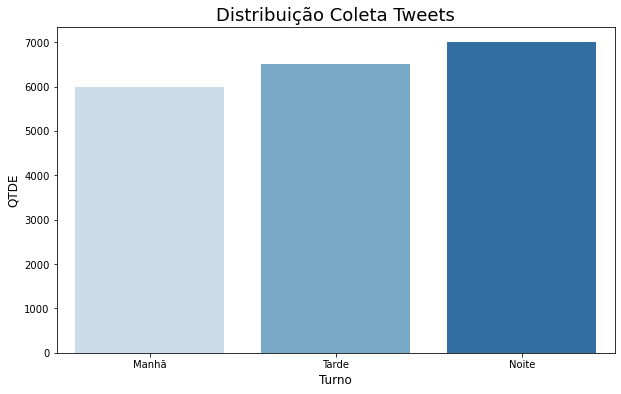

Noite    7000
Tarde    6500
Manhã    6000
dtype: int64

In [5]:
## A coleta dos tweets foi no dia 19/03/21 em três horários distintos
## Coleta 1 - Tweets coletados pela manhã
plt.figure(figsize = (10, 6))
sns.countplot(x = 'turno_coleta' , data = base, palette="Blues")
plt.title('Distribuição Coleta Tweets',fontsize=18)
plt.xlabel('Turno', fontsize=12)
plt.ylabel('QTDE', fontsize=12)
plt.show()

## Quantidade de Tweets coletatos
pd.value_counts(base['turno_coleta'].values.flatten())


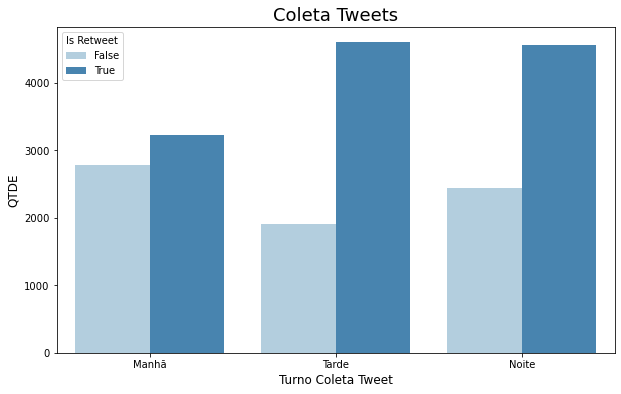

In [6]:
## A coleta dos tweets foi no dia 19/03/21 em três horários distintos
## "Is Retweet" indica se o tweet foi retuitado (repostado) pelo usuário
plt.figure(figsize = (10, 6))
sns.countplot(x = 'turno_coleta' , data = base, hue='Is Retweet',palette="Blues")
plt.title('Coleta Tweets',fontsize=18)
plt.xlabel('Turno Coleta Tweet', fontsize=12)
plt.ylabel('QTDE', fontsize=12)
plt.show()


In [7]:
## Tabela Cruzada do Turno da coleta pela indicação se a postagem é um retweet
data_crosstab = pd.crosstab(base['turno_coleta'],
                            base['Is Retweet'], 
                               margins = True)
print(data_crosstab)

Is Retweet    False   True    All
turno_coleta                     
Manhã          2780   3220   6000
Noite          2447   4553   7000
Tarde          1900   4600   6500
All            7127  12373  19500


In [8]:
## Tweet mais Retuitado
usr=base['Retweet from'].iloc[base['Retweeted'].idxmax()]
tt=base['Tweet'].iloc[base['Retweeted'].idxmax()]

texto = 'Tweet mais retuitado: '+ tt + os.linesep + 'Conta tweet original: '+ '@' +usr 
print(texto)

Tweet mais retuitado: RT @DisneyPlusBR: Honre o legado do escudo. #FalcãoEOSoldadoInvernal, uma Série Original da Marvel Studios. Novos episódios toda sexta. Só no #DisneyPlus.
Conta tweet original: @DisneyPlusBR


In [9]:
base.iloc[base['Retweeted'].idxmax()]

Grupo                                                            Coleta 3
turno_coleta                                                        Noite
Tweet                   RT @DisneyPlusBR: Honre o legado do escudo. #F...
Tweet ID                                                        806817804
Time                                                  2021-03-19 13:37:44
Favorited                                                               0
Retweeted                                                            1056
Is Favourited                                                       False
Is Retweeted                                                        False
Is Retweet                                                           True
Retweet from                                                 DisneyPlusBR
Latitude                                                              NaN
Longitude                                                             NaN
Country                               

In [10]:
## Tweet mais favoritado
usr=base['User'].iloc[base['Favorited'].idxmax()]
tt=base['Tweet'].iloc[base['Favorited'].idxmax()]

texto = 'Tweet mais favoritado: '+ tt + os.linesep + 'Conta tweet original: '+ '@' +usr 
print(texto)


Tweet mais favoritado: ESSA SEMANA VAI SER TUDOOO

Amanhã tem #SnyderCut 
Sexta tem Falcão e o Soldado Invernal

E OS FÃS VENCEM E VENCEM https://t.co/2xXH6gUMaK
Conta tweet original: @NacaoMarvell


In [11]:
##base.iloc[base['Favorited'].idxmax()]

In [12]:
## Printando a conta que possui o maior número de seguidores
usr=base['User'].iloc[base['User - Followers'].idxmax()]
tt=base['Tweet'].iloc[base['User - Followers'].idxmax()]

texto = 'A conta com o maior número de Tweets: '+ '@'+usr + os.linesep + 'Tweet: '+ tt
print(texto)


A conta com o maior número de Tweets: @g1
Tweet: #G1 já viu e te conta o que esperar  da temporada que estreia nesta sexta-feira https://t.co/BJTUthNL3Y


## Análise de Sentimentos 

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
## Removento as Stopwords
additional  = ['rt','rts','retweet', 'RT','RTS']
swords = set().union(stopwords.words('portuguese'),additional)

In [15]:
swords

{'RT',
 'RTS',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houveríamos'

In [16]:
## Remover caracteres, links...
base['processed_text'] = base['Tweet'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace(':', ' ')\
          .str.replace('.', ' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])


In [17]:
## Texto pré processado
base['processed_text']


0        ['falcão, soldado, invernal', primeiro, episód...
1        [bom, dia, pois, hoje, falcão, soldado, invernal]
2        [toda, sexta, agora, inferno, hsuahajajs, amo,...
3        [hoje, dia, entro, aqui, tt, medo, ver, spoile...
4        [wallpapers, falcão, soldado, invernal, #falcã...
                               ...                        
19495    [novo, trailer, oficial, falcão, soldado, inve...
19496    [novo, trailer, oficial, falcão, soldado, inve...
19497    [novo, trailer, oficial, falcão, soldado, inve...
19498    [semana, semana, fãs, super-heróis, quinta-fei...
19499    [novo, trailer, oficial, falcão, soldado, inve...
Name: processed_text, Length: 19500, dtype: object

In [18]:
base['Tweet']

0        RT @cinepop: 'Falcão e o Soldado Invernal': Pr...
1        BOM DIA POIS HOJE TEM FALCÃO E O SOLDADO INVERNAL
2        Toda sexta agora esse inferno hsuahajajs eu am...
3        Hoje é o dia que eu nem entro aqui no tt com m...
4        RT @disneygobr: Wallpapers de Falcão e o Solda...
                               ...                        
19495    RT @SeriesTWBZ: Novo trailer oficial de Falcão...
19496    RT @SeriesTWBZ: Novo trailer oficial de Falcão...
19497    RT @SeriesTWBZ: Novo trailer oficial de Falcão...
19498    Essa semana é A Semana para fãs de super-herói...
19499    RT @SeriesTWBZ: Novo trailer oficial de Falcão...
Name: Tweet, Length: 19500, dtype: object

In [19]:
import nltk.sentiment.vader as vd
from nltk import download
nltk.download('punkt')
download('vader_lexicon')
sia = vd.SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\natya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
## Calculadno o Score do sentimento
from nltk.tokenize import word_tokenize
base['sentiment_score'] = base['processed_text'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )

In [21]:
base[['sentiment_score','processed_text']].head(n=10 )

,sentiment_score,processed_text
0,0.0000,"['falcão, soldado, invernal', primeiro, episód..."
1,0.0000,"[bom, dia, pois, hoje, falcão, soldado, invernal]"
2,0.0000,"[toda, sexta, agora, inferno, hsuahajajs, amo,..."
3,0.0000,"[hoje, dia, entro, aqui, tt, medo, ver, spoile..."
4,0.0000,"[wallpapers, falcão, soldado, invernal, #falcã..."
5,0.0000,"[gostei, bastante, 1ep, falcão, soldado, inver..."
6,0.8430,"[nao, importa, tempo, passe,, nunca, vou, esqu..."
7,0.7397,"[honre, legado, escudo, #falcãoeosoldadoinvern..."
8,0.0000,"[reativei, pra, surtar, falcão, soldado, inver..."
9,0.0000,"[falcão, soldado, invernal, vão, salvar, sexta..."


In [22]:
## Realizando a classificação do sentimento em categorias
sent_clasification = pd.cut(base['sentiment_score'],\
          [-3,-1.2, 0, 1.2 , 3],\
          right=True,\
          include_lowest=True,\
          labels=['strongly negative', 'negative', 'positive', 'strongly positive'])

In [23]:
sent_clasification.value_counts()

negative             15590
positive              3907
strongly positive        3
strongly negative        0
Name: sentiment_score, dtype: int64

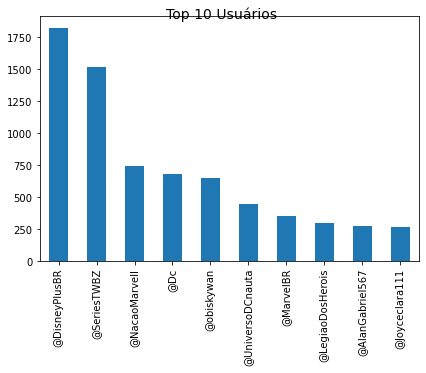

In [24]:
## Plot Usuarios Twitter
plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 10 Usuários', fontsize=14)
base['Tweet'].str\
          .findall('(@[A-Za-z0-9]+)')\
          .apply(lambda x: pd.value_counts(x))\
          .sum(axis=0)\
          .sort_values(ascending=False)[:10]\
          .plot(kind='bar')
plt.show()

In [25]:
## Ocorrencia palavras mais ditas
words = base['processed_text'].dropna()\
                            .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']

In [26]:
## Observas as palavras relacionadas aos personagens título da série
## Também há palava snydercut relacionada ao filme da DC que estreou no dia anterior à série do "Falcao e o Soldado Invernal"
words.head()

,word,occurences
3882,soldado,5915.0
1741,falcão,5238.0
2268,invernal,2932.0
2631,marvel,2359.0
1660,estreia,1928.0


In [27]:
## Bigramas - Análises de palavras ditas em conjunto
from nltk import bigrams
bigramseries = pd.Series([word for sublist in base['processed_text'].dropna()\
                    .apply(lambda x: [i for i in bigrams(x)])\
                    .tolist() for word in sublist])\
                    .value_counts()

In [28]:
bigramseries.head(50)

(falcão, soldado)                                            9425
(soldado, invernal)                                          9172
(marvel, studios)                                            1534
(19, março)                                                  1410
(sam, wilson)                                                1103
(#snydercut, sexta)                                          1082
(steve, rogers)                                               980
(#falcãoeosoldadoinvernal,, marvel)                           909
(capitão, américa)                                            881
(sexta, falcão)                                               881
(série, original)                                             873
(original, marvel)                                            873
(honre, legado)                                               816
(legado, escudo)                                              816
(vai, ser)                                                    810
(invernal,